In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stock
import base_analysis
import return_analysis as ra
import itertools
import scipy.stats as scs
from importlib import reload
from sklearn.linear_model import LinearRegression
%matplotlib inline

# INTC

In [2]:
reload(stock)
reload(base_analysis)
reload(ra)

<module 'return_analysis' from '/Users/ryohayama/python/DowJones/return_analysis.py'>

In [3]:
intc = stock.Stock('./stocks/INTC.csv')

In [4]:
intc_ra = ra.ReturnAnalysis(intc, windows=[1, 5, 10, 20, 50, 100, 200])

In [5]:
intc_ra.print_info()

============ ./stocks/INTC Basic Info ============
Start Date - 1980-03-17
 End  Date - 2017-12-22
Number of data points - 9528
Number of missing data points - 0


In [6]:
intc_ra._window_labels_future

['+1day_return',
 '+5day_return',
 '+10day_return',
 '+20day_return',
 '+50day_return',
 '+100day_return',
 '+200day_return']

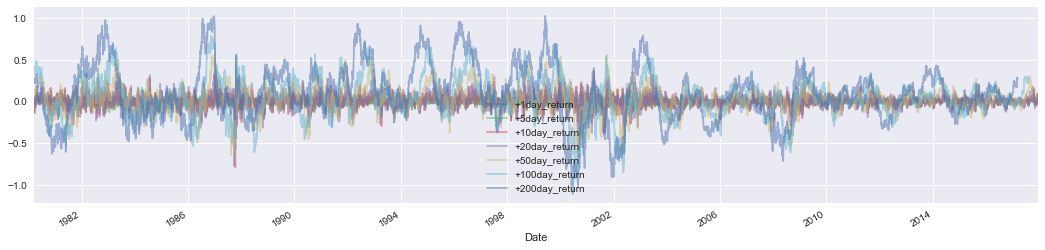

In [7]:
intc_ra.plot(include='future')

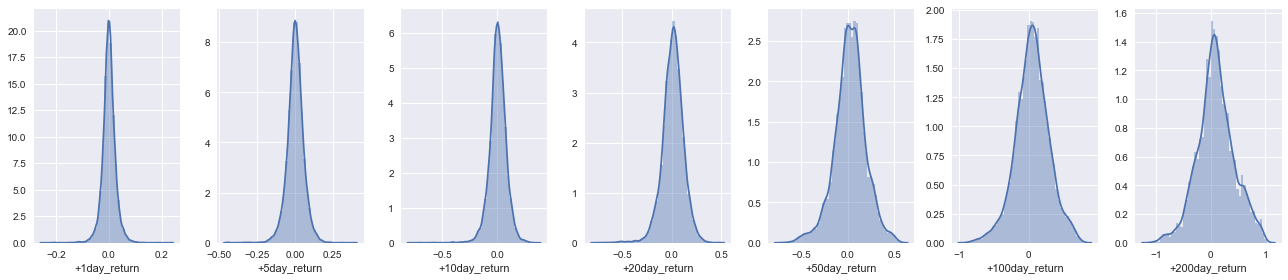

In [8]:
intc_ra.hist(bins=100)

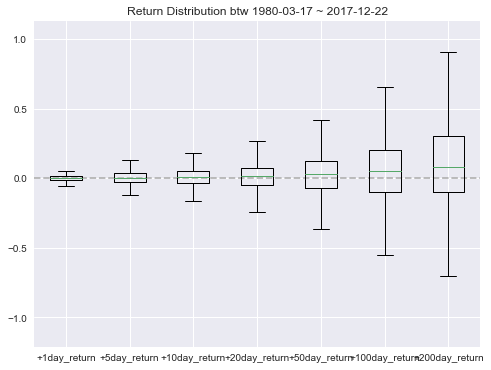

In [9]:
intc_ra.boxplot(bins=40)

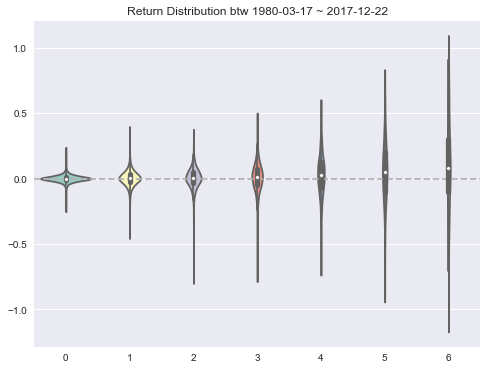

In [10]:
intc_ra.violinplot()

In [11]:
intc_ra.stats()

,median,mean,std,min,max,5_percentile,95_percentile,frac_positive,frac_negative,n_points
+1day_return,0.000000,0.000521,0.025259,-0.248884,0.234108,-0.038027,0.040194,0.489871,0.467408,9527
+5day_return,0.003292,0.002610,0.055326,-0.447189,0.386773,-0.086178,0.089851,0.520319,0.462039,9523
+10day_return,0.005893,0.005212,0.075284,-0.785929,0.361877,-0.116466,0.123794,0.534251,0.453457,9518
+20day_return,0.014021,0.010418,0.106647,-0.766759,0.480125,-0.163545,0.177381,0.558372,0.434161,9508
+50day_return,0.029073,0.026005,0.167258,-0.704902,0.569533,-0.258260,0.296147,0.577970,0.417282,9478
+100day_return,0.051614,0.050452,0.241564,-0.894749,0.783457,-0.349979,0.454931,0.592915,0.402100,9428
+200day_return,0.083916,0.097471,0.338886,-1.104122,1.025031,-0.443822,0.697290,0.627573,0.370390,9328


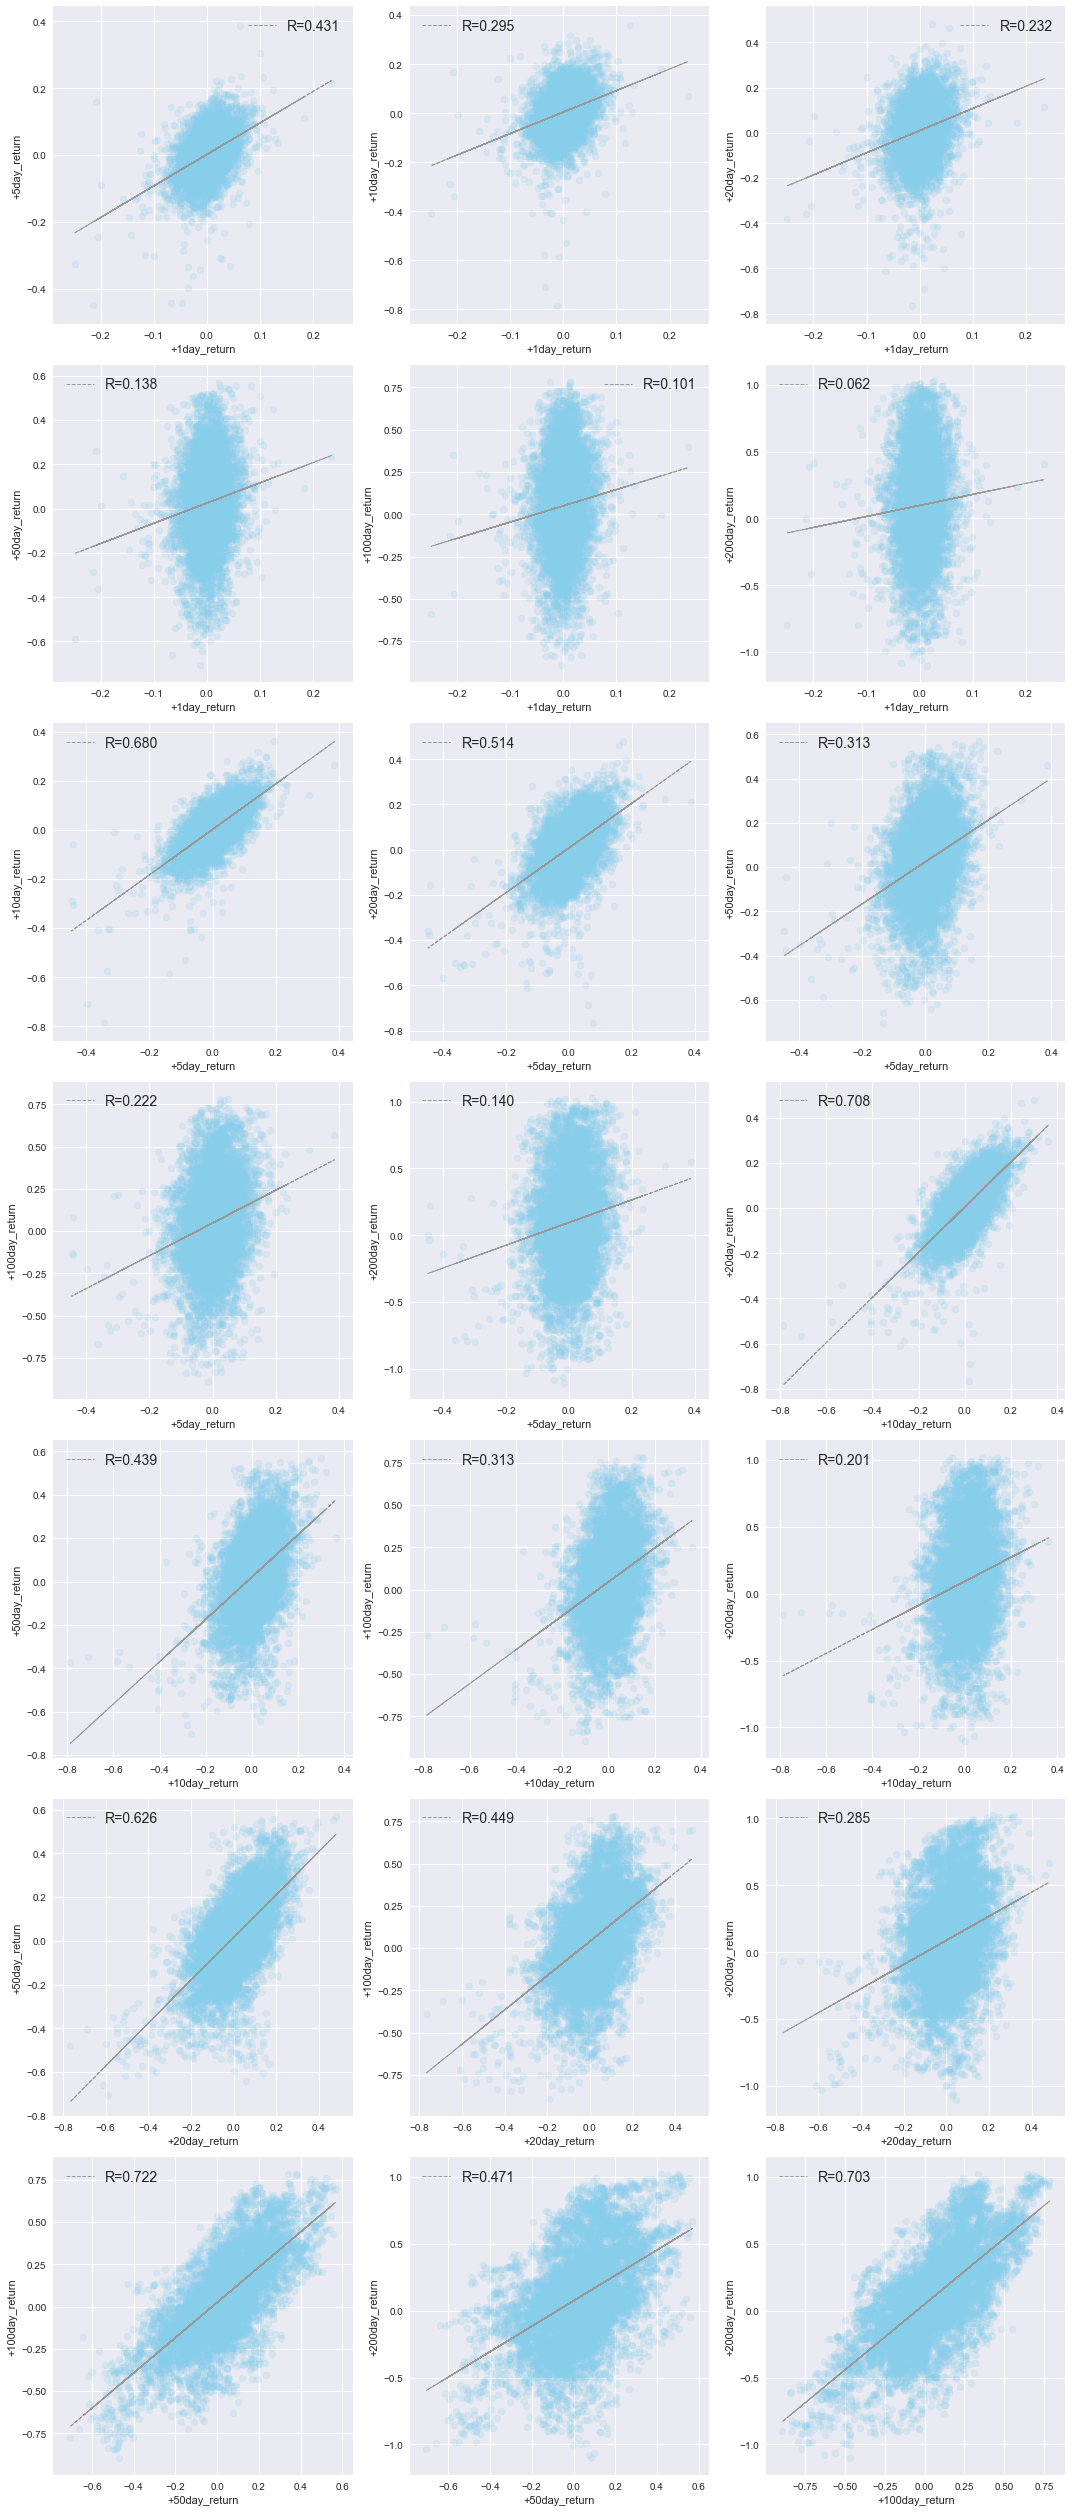

In [46]:
fig = plt.figure(figsize=(15, 35))
counter = 1
for combo in itertools.combinations(intc_ra._window_labels_future, 2):
    key1 = combo[0]
    key2 = combo[1]
    X = np.array(intc_ra.data[[key1, key2]].dropna())
    x1 = X[:, 0].reshape(-1, 1)
    x2 = X[:, 1].reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x1, x2)
    a = lr.coef_
    b = lr.intercept_
    x2_hat = a*x1 + b
    corr = scs.pearsonr(x1, x2)[0]
    
    ax = fig.add_subplot(7, 3, counter)
    counter += 1
    label = 'R=%.3f' % corr
    ax.scatter(x1, x2, color='skyblue', alpha=0.2, label=None)
    ax.plot(x1, x2_hat, color='0.6', ls='--', lw=1, label=label)
    ax.legend(fontsize=14)
    ax.set_xlabel(key1)
    ax.set_ylabel(key2)
plt.tight_layout()

In [ ]:
for i in range(len(intc_ra.data['+1day_return'])-1):
    if (intc_ra.data['+10day_return'][i] - intc_ra.data['+10day_return'][i+1]) > 0:
        color = 'yellowgreen'
    else:
        color = 'pink'
    plt.plot(intc_ra.data['+1day_return'][i:i+2], 
             intc_ra.data['+10day_return'][i:i+2], 
             color=color, lw=0.1)

In [ ]:
plt.scatter(intc_ra.data['+1day_return'], intc_ra.data['+10day_return'], s=10, alpha=0.2)

# AMZN

In [38]:
amzn_ra = ra.ReturnAnalysis('./stocks/AMZN.csv')

In [39]:
amzn_ra.print_info()

============ ./stocks/AMZN Basic Info ============
Start Date - 1997-05-15
 End  Date - 2017-12-22
Number of data points - 5188
Number of missing data points - 0


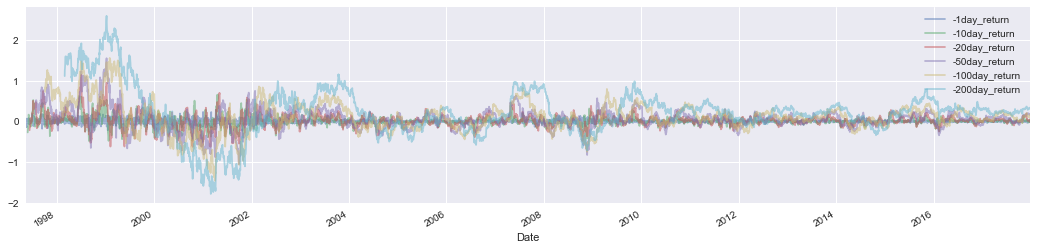

In [40]:
amzn_ra.plot()

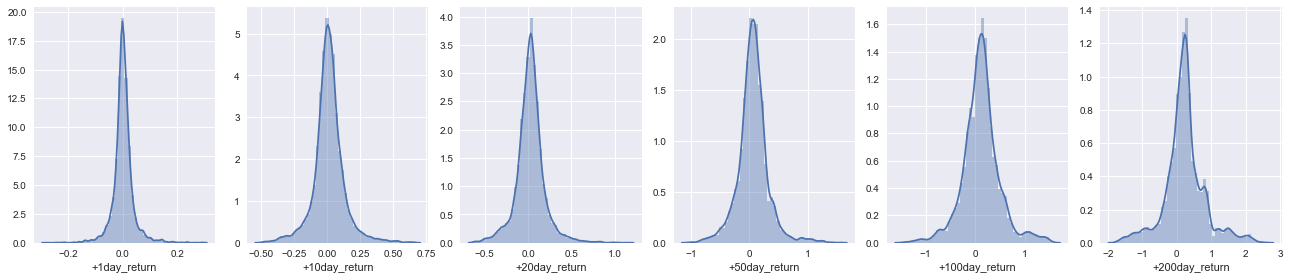

In [41]:
amzn_ra.hist(bins=100)

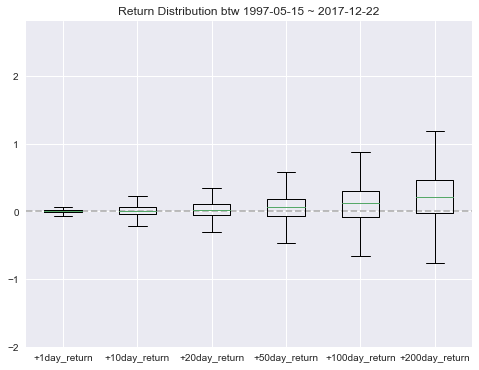

In [42]:
amzn_ra.boxplot(bins=40)

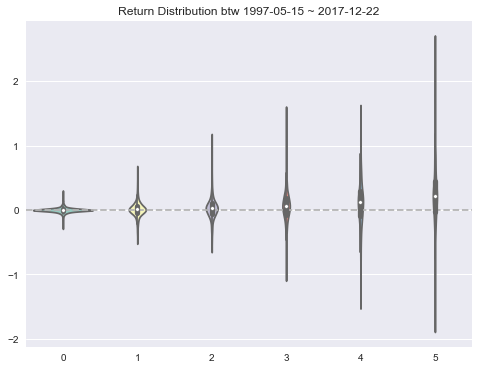

In [43]:
amzn_ra.violinplot()

In [44]:
amzn_ra.stats()

,median,mean,std,min,max,5_percentile,95_percentile,frac_positive,frac_negative,n_points
+1day_return,0.000157,0.001232,0.038232,-0.284568,0.296181,-0.053684,0.059372,0.501639,0.491806,5187
+10day_return,0.009720,0.012757,0.118802,-0.499956,0.660357,-0.176767,0.197774,0.554461,0.444573,5178
+20day_return,0.025625,0.025593,0.165002,-0.620274,1.148209,-0.244561,0.286596,0.594427,0.404412,5168
+50day_return,0.059846,0.062862,0.261140,-1.045289,1.554231,-0.351278,0.460931,0.633126,0.366290,5138
+100day_return,0.117951,0.120901,0.376413,-1.453983,1.555580,-0.473484,0.725975,0.670794,0.329009,5088
+200day_return,0.213344,0.229927,0.586628,-1.776011,2.594262,-0.809871,1.309371,0.728549,0.271451,4988
